In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
workforce = pd.read_csv('data/monthly-sutter-county-workforce.csv', index_col=0, parse_dates=True)

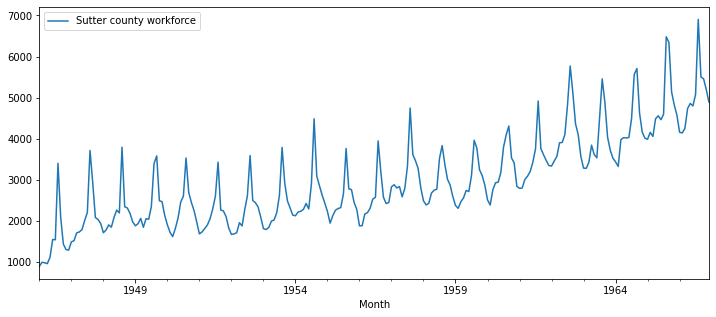

In [4]:
workforce.plot(figsize=(12,5))
plt.show()

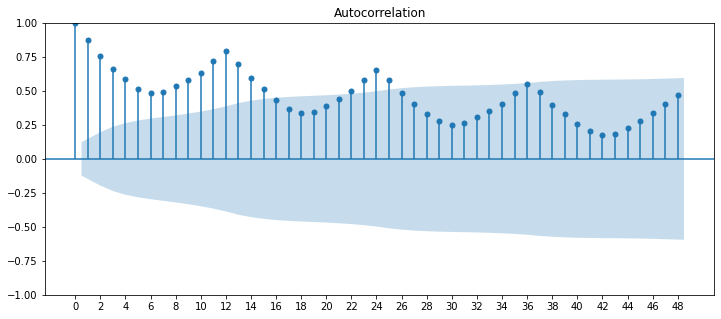

In [18]:
plt.rcParams['figure.figsize'] = (12,5)
plot_acf(workforce['Sutter county workforce'].dropna(), lags=48)
plt.xticks(np.arange(0, 50, 2))
plt.show()

In [20]:
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [21]:
y_transformation = pd.DataFrame(workforce['Sutter county workforce'].values, columns=['initial'])
y_transformation['seasonal_diff'] = y_transformation['initial'].diff(12)

In [22]:
print("Критерий Дики-Фуллера для исходного ряда: p=%f" % adfuller(y_transformation['initial'])[1])
print("После сезонного дифференцирования: p=%f" % adfuller(y_transformation['seasonal_diff'].dropna())[1])

Критерий Дики-Фуллера для исходного ряда: p=0.986415
После сезонного дифференцирования: p=0.000206


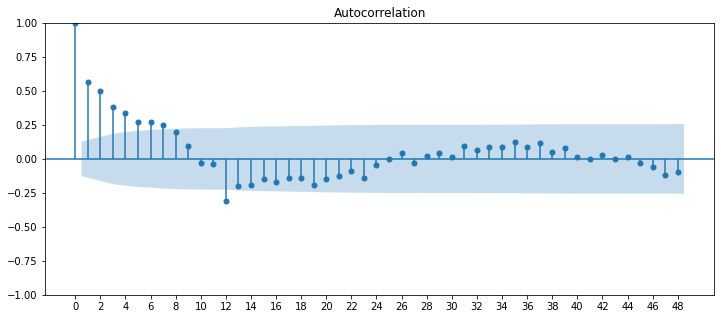

In [23]:
plt.rcParams['figure.figsize'] = (12,5)
plot_acf(y_transformation['seasonal_diff'].dropna(), lags=48)
plt.xticks(np.arange(0, 50, 2))
plt.show()

q=7, Q=1

D:\ForecastingMethods\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


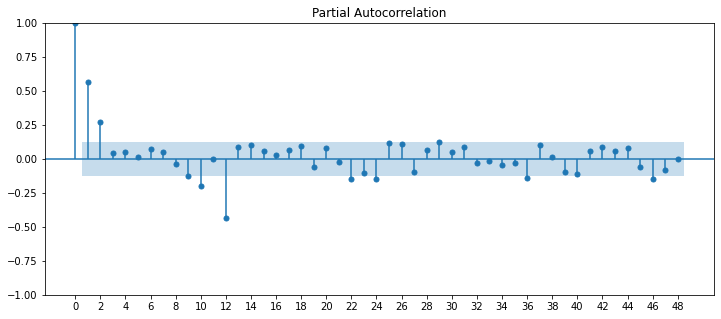

In [24]:
plt.rcParams['figure.figsize'] = (12,5)
plot_pacf(y_transformation['seasonal_diff'].dropna(), lags=48)
plt.xticks(np.arange(0, 50, 2))
plt.show()

p=2, P=2

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product

In [26]:
p = range(1, 3)
q = range(7, 8)
P = range(1, 3)
Q = range(0, 2)

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
len(parameters_list)

8

In [27]:
list_model = []
for (p,q,P,Q) in parameters_list:
    try:
        list_model.append(SARIMAX(y_transformation['initial'], 
                order=(p, 0, q), 
                seasonal_order=(P, 1, Q, 12)).fit())
    except ERROR:
        pass

D:\ForecastingMethods\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ForecastingMethods\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ForecastingMethods\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ForecastingMethods\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\ForecastingMethods\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood op

In [28]:
a = list(map(lambda x: x.aic,list_model))
best_model = list_model[a.index(min(a))]

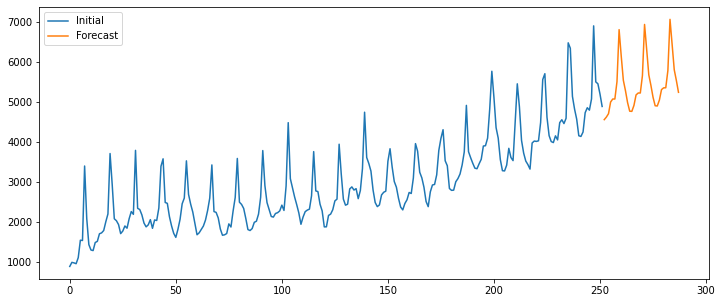

In [29]:
y_transformation['initial'].plot(figsize=(12,5))
best_model.forecast(36).plot()
plt.legend(['Initial', 'Forecast'])
plt.show()